# Kaggle题目：泰坦尼克号获救预测  


1. [引用的库](#p1)
2. [读取数据集并大概分析数据](#p2)
3. [处理缺失值](#p3)
4. [数据可视化分析](#p4)
5. [特征编码与融合](#p5)
6. [特征标准化](#p6)
7. [建模](#p7)
8. [模型评估与选择](#p8)

<a id="p1"></a>
## 1.引入库  
* `numpy`  
* `pandas`  
* `seaborn`  
* `pyplot`  

In [1]:
#coding:utf-8
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import pyplot as plt
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题

import warnings
warnings.filterwarnings("ignore")

<a id="p2"></a>
## 2.读取数据集并大概分析数据

In [2]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(training.keys())
print(testing.keys())

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


**<font color=red>有以下这些字段</font>**  
PassengerId => 乘客ID  
Pclass => 乘客等级(1/2/3等舱位)  
Name => 乘客姓名  
Sex => 性别  
Age => 年龄  
SibSp => 堂兄弟/妹个数  
Parch => 父母与小孩个数  
Ticket => 船票信息  
Fare => 票价  
Cabin => 客舱  
Embarked => 登船港口 

In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


训练数据中总共有891名乘客，但属性的数据不全  

* Age（年龄）只有714名乘客有记录  
* Cabin（客舱）只有204名乘客有记录  

同时发现只有只有年龄与船票价格为连续值，而性别（男，女） 登船地点（S,Q,C）为离散值  

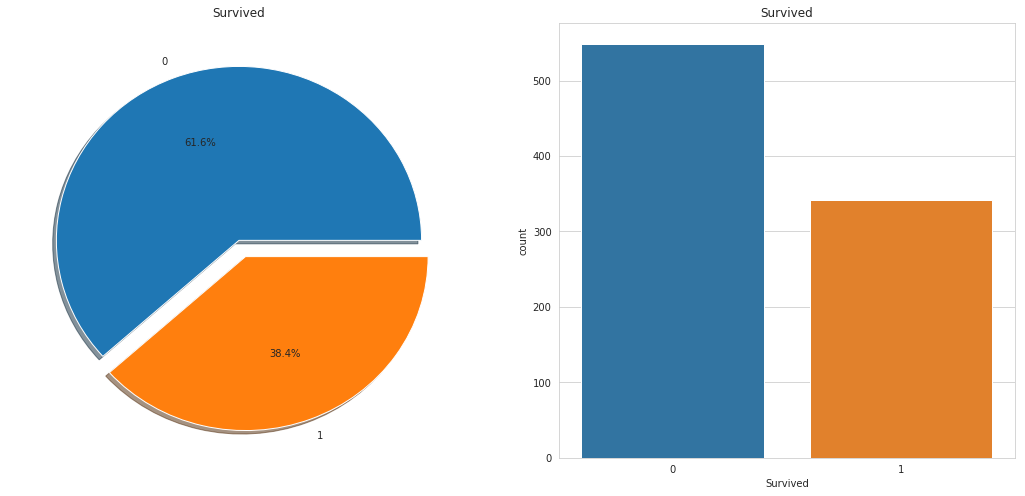

生还者 342 人, 549 人未生还


In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
training['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=training,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#891人生还情况：
totalSurvivedNum = training['Survived'].sum()
totalNotSurvivedNum = 891 - training['Survived'].sum()
print "生还者 %d 人, %d 人未生还" % (totalSurvivedNum, totalNotSurvivedNum)

<a id="p3"></a>
## 3.处理缺失值

* 方法1：直接使用均值/中位数进行填充
* 方法2：根据经验值填充
* 方法3：回归模型预测
* 方法4：剔除掉
> Note:   
> 1. 如果缺值的样本占总数比例极高，可以直接舍弃  
> 2. 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中  
> 3. 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step，然后把它离散化，之后把NaN作为一个type加到属性类目中。  
> 4. 有些情况下，缺失的值个数并不是特别多，也可以试着根据已有的值，拟合一下数据，补充上。

In [10]:
def null_value(training, testing):
    print("Training Data Missing")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Missing")
    print(pd.isnull(testing).sum())
    
null_value(training, testing)

Training Data Missing
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Missing
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 发现缺失的特征为Age（年龄）,Cabin（客舱号）,Embarked（登陆点）

##### 1. 对于Cabin缺失过多，先分析统计情况

In [11]:
training.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

发现Cabin的分布过于离散，且因为缺失量过大，所以连同无关变量Ticket（船票编号）一同删掉。

In [12]:
training.drop(labels=['Cabin','Ticket'], axis=1, inplace=True)
testing.drop(labels=['Cabin','Ticket'], axis=1, inplace=True)

null_value(training, testing)

Training Data Missing
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Missing
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


##### 2. 对于Embarked，因为只缺失了2个，观察其分布，用众数进行填充

In [13]:
training.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
training['Embarked'].fillna('S', inplace=True)
null_value(training, testing)

Training Data Missing
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64
 
Testing Data Missing
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


##### 3. 对于Fare，只在测试集缺失一条，直接用中位数填充

In [15]:
testing['Fare'].fillna(testing['Fare'].median(), inplace=True)
null_value(training, testing)

Training Data Missing
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64
 
Testing Data Missing
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64


##### 4. 对于Age，首先观察其分布情况

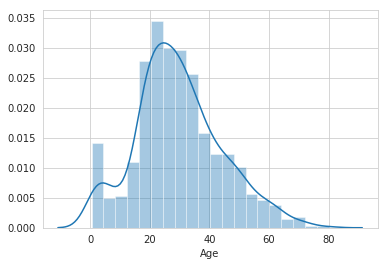

In [16]:
copy = training.copy()
copy.dropna(inplace=True)
sns.distplot(copy.Age)

因Age为连续值，可尝试分为多个step，来将其离散化。通过检查名字特征可以看到名字有像先生或夫人这样的称呼，这样就可以把先生和夫人的平均值分配给各自的组。

In [17]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [18]:
pd.crosstab(training.Title, training.Sex)\
    .T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
training['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
testing['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],\
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

In [20]:
training.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
def set_missing_age(data):
    # 使用每组的均值来进行填充
    data.loc[(data.Age.isnull()) & (data.Title=='Master'), 'Age'] = 5
    data.loc[(data.Age.isnull()) & (data.Title=='Miss'), 'Age'] = 22
    data.loc[(data.Age.isnull()) & (data.Title=='Mr'), 'Age'] = 33
    data.loc[(data.Age.isnull()) & (data.Title=='Mrs'), 'Age'] = 36
    data.loc[(data.Age.isnull()) & (data.Title=='Other'), 'Age'] = 46
set_missing_age(training)
set_missing_age(testing)

In [56]:
null_value(training, testing)

Training Data Missing
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamSize        0
IsAlone        0
dtype: int64
 
Testing Data Missing
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamSize        0
IsAlone        0
dtype: int64


目前为止，所有数据都已完整。

In [23]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [24]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


<a id="p4"></a>
## 4.数据可视化分析  
对于特征理解分析分为三部分

1. 单特征分析，逐个变量分析其对结果的影响
2. 多变量统计分析，综合考虑多种情况影响
3. 统计绘图得出结论


通过可视化分析从而得到特征的熵和信息益增

### 性别 gender

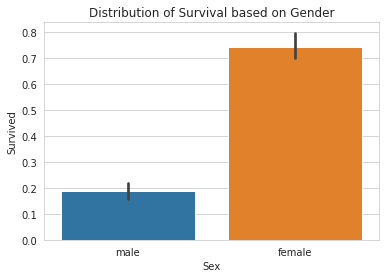

获救者总数: 342
获救者中女性占: 68.13%
获救者中男性占: 31.87%


In [25]:
from __future__ import division
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print u"获救者总数: " + str((total_survived_females + total_survived_males))
print u"获救者中女性占: %.2f%%" % \
    (total_survived_females/(total_survived_females + total_survived_males) * 100)
print u"获救者中男性占: %.2f%%" % \
    (total_survived_males/(total_survived_females + total_survived_males) * 100)

由上可得出虽然船上男性较多，但获救者中，女性是男性的2倍，而图中可得在船上，女性的生存几率是男性的三倍，大于70%。
可见，性别对于生存结果是个很重要的特征。

### 船舱等级class

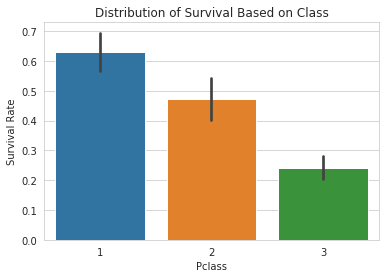

获救者总数: 342
获救者中一等舱占: 39.77%
获救者中二等舱占: 25.44%
获救者中三等舱占: 34.80%


In [26]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print u"获救者总数: " + str(total_survived_class)
print u"获救者中一等舱占: %.2f%%" % \
    (total_survived_one/total_survived_class * 100)
print u"获救者中二等舱占: %.2f%%" % \
    (total_survived_two/total_survived_class * 100)
print u"获救者中三等舱占: %.2f%%" % \
    (total_survived_three/total_survived_class * 100)

### 性别与船舱等级对生存率的联合影响

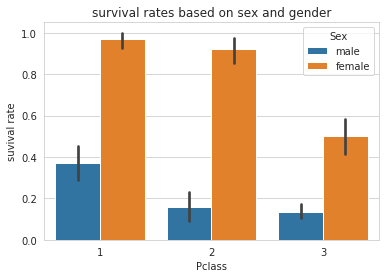

In [27]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=training)
plt.ylabel('suvival rate')
plt.title('survival rates based on sex and gender')
plt.show()

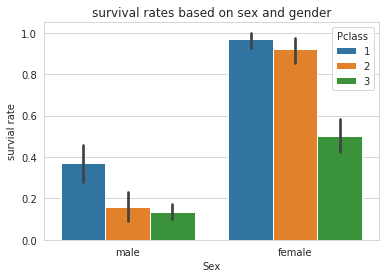

In [28]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=training)
plt.ylabel('survial rate')
plt.title('survival rates based on sex and gender')
plt.show()

对于船舱等级而言，等级一的更容易存货。

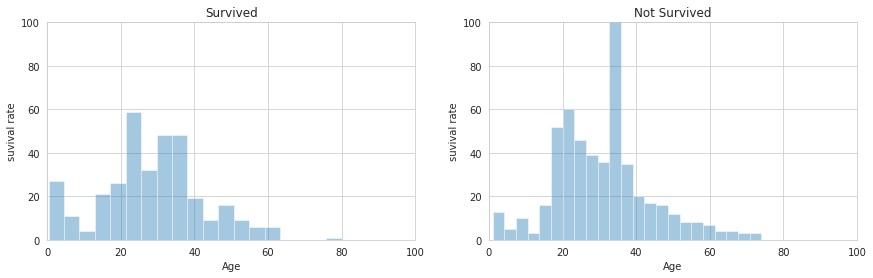

In [29]:
survived_ages = training[training.Survived == 1]['Age']
not_survived_ages = training[training.Survived == 0]['Age']

plt.subplot(1,2,1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel('suvival rate')
plt.subplot(1,2,2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Not Survived")
plt.ylabel('suvival rate')
plt.subplots_adjust(right=2)
plt.show()

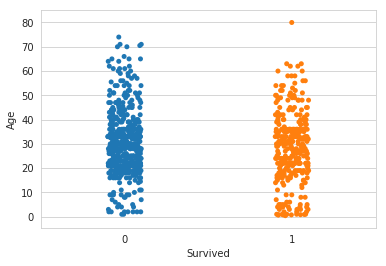

In [30]:
sns.stripplot(x='Survived', y='Age', data=training)
plt.show()

根据图表可以看出  
1）幼儿的获救率较高  
2）死亡人数最高的是30-40岁年龄组

### 所有特征相关性热力图

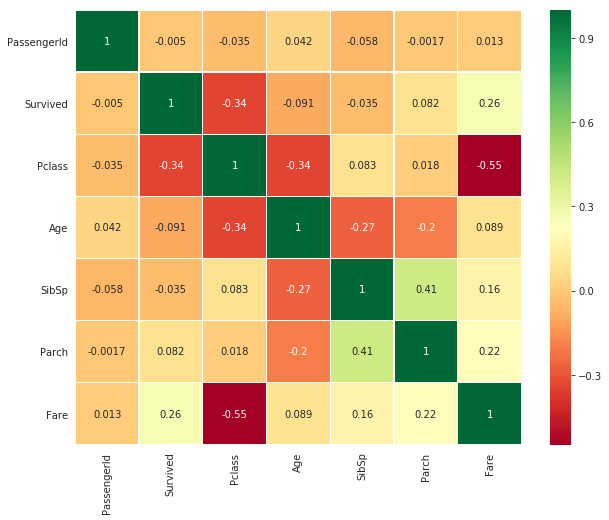

In [31]:
sns.heatmap(training.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

首先要注意的是，只有数值特征进行比较

正相关：如果特征A的增加导致特征b的增加，那么它们呈正相关。值1表示完全正相关。

负相关：如果特征A的增加导致特征b的减少，则呈负相关。值-1表示完全负相关。

现在让我们说两个特性是高度或完全相关的，所以一个增加导致另一个增加。这意味着两个特征都包含高度相似的信息，并且信息很少或没有变化。这样的特征对我们来说是没有价值的！

那么你认为我们应该同时使用它们吗？。在制作或训练模型时，我们应该尽量减少冗余特性，因为它减少了训练时间和许多优点。

现在，从上面的图，我们可以看到，特征不显著相关。

<a id="p5"></a>
## 5.1 特征编码

In [32]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [33]:
set(training["Embarked"])

{'C', 'Q', 'S'}

对于性别Sex，登陆点Embarked，称呼Title仍为string字典，需要对他们进行编码

#### sex编码
> female:0  
> male:1

In [34]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training['Sex'])
print list(le_sex.classes_)

encoded_sex_training = le_sex.transform(training['Sex'])
training['Sex'] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing['Sex'])
testing['Sex'] = encoded_sex_testing

['female', 'male']


#### embarked编码
> C:0  
> Q:1  
> S:2

In [35]:
le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])
print list(le_embarked.classes_)

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

['C', 'Q', 'S']


#### 称呼编码  
| 称呼 | 编码 |
| --- | ---- |
| Master | 0 |
| Miss | 1 |
| Mr | 2 |
| Mrs | 3 |
| Other | 4 |

In [36]:
le_title = LabelEncoder()
le_title.fit(training['Title'])
print list(le_title.classes_)

encoded_title_training = le_title.transform(training['Title'])
training['Title'] = encoded_title_training
encoded_title_testing = le_title.transform(testing['Title'])
testing['Title'] = encoded_title_testing

['Master', 'Miss', 'Mr', 'Mrs', 'Other']


In [37]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,3
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,2,2


## 5.2 特征融合

SibSp兄妹个数与Parch父母孩子个数这两个特征可以整合为家庭成员个数

In [38]:
training['FamSize'] = training['SibSp'] + training['Parch'] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [39]:
training['IsAlone'] = training.FamSize.apply(lambda x:1 if x == 1 else 0)
testing['IsAlone'] = testing.FamSize.apply(lambda x:1 if x == 1 else 0)

In [40]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,2,2,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,3,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,1,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,2,1,1


所有的特征都是数值变量，对于age和fare要进行归一化

<a id="p6"></a>
## 6.特征标准化

In [41]:
from sklearn.preprocessing import StandardScaler

def value_scaler(data):
    scaler = StandardScaler()
    ages = np.array(data['Age']).reshape(-1, 1)
    fares = np.array(data['Fare']).reshape(-1, 1)
    
    data['Age'] = scaler.fit_transform(ages)
    data['Fare'] = scaler.fit_transform(fares)

value_scaler(training)
value_scaler(testing)

In [42]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
0,1,0,3,1,-0.590771,1,0,-0.502445,2,2,2,0
1,2,1,1,0,0.614586,1,0,0.786845,0,3,2,0
2,3,1,3,0,-0.289432,0,0,-0.488854,2,1,1,1
3,4,1,1,0,0.388582,1,0,0.420730,2,3,2,0
4,5,0,3,1,0.388582,0,0,-0.486337,2,2,1,1


In [43]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
0,892,3,1,0.326880,0,0,-0.497413,1,2,1,1
1,893,3,0,1.286672,1,0,-0.512278,2,3,2,0
2,894,2,1,2.438422,0,0,-0.464100,1,2,1,1
3,895,3,1,-0.248995,0,0,-0.482475,2,2,1,1
4,896,3,0,-0.632912,1,1,-0.417492,2,3,3,0


<a id="p7"></a>
## 7.模型训练与预测

#### 使用如下模型进行训练，并进行打分  
1) 支持向量机  
2) 随机森林   
3) 逻辑回归  
4) k-临近  
5) 朴素贝叶斯  
6) 决策树

In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

/Users/zhengy/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### 通过metrics库的make_scorer与accuracy_score来评价模型性能
#### 通过GridSearchCV来找出所选模型的最佳超参

In [45]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#### 再将训练数据切分为训练集与验证集

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train = training.drop(labels=['PassengerId', 'Survived'], axis=1)
y_train = training['Survived']
X_test = testing.drop("PassengerId", axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
0,3,1,-0.590771,1,0,-0.502445,2,2,2,0
1,1,0,0.614586,1,0,0.786845,0,3,2,0
2,3,0,-0.289432,0,0,-0.488854,2,1,1,1
3,1,0,0.388582,1,0,0.420730,2,3,2,0
4,3,1,0.388582,0,0,-0.486337,2,2,1,1


In [48]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### SVC Model

In [49]:
svc_clf = SVC()
svc_paramaters = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, svc_paramaters, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print "SVC score: %s" % (str(acc_svc)) 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]SVC score: 0.8212290502793296


In [50]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print "RandomForest score: %s" % (str(acc_rf)) 

RandomForest score: 0.8044692737430168


#### Logistic回归

In [51]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print "Logistic Regression score: %s" % (str(acc_logreg))

Logistic Regression score: 0.7988826815642458


#### KNN

In [52]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print "KNeighbors score: %s" % (str(acc_knn))

KNeighbors score: 0.8044692737430168


<a id="p8"></a>
## 8.评估各模型性能并选择最优模型进行预测

In [53]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Random Forest", "Logistic Regression", "K Nearest Neighbors"],
    "Accuracy": [acc_svc, acc_rf, acc_logreg, acc_knn]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Accuracy,Model
0,0.821229,SVC
1,0.804469,Random Forest
3,0.804469,K Nearest Neighbors
2,0.798883,Logistic Regression


#### 最终选择随机森林作为模型，用所有train数据作为训练数据，预测结果

In [54]:
rf_clf.fit(X_train, y_train)

result_predictions = rf_clf.predict(X_test)

In [55]:
result = pd.DataFrame({
        "PassengerId" : testing['PassengerId'],
        "Survived": result_predictions
    })
result.to_csv("titanic.csv", index=False)
print result

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3